# OPS vs OPS+

How well do OPS and OPS+ predict scoring?

In [1]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_parquet('../data/baseballdatabank/teams.parquet')
df.columns.values

array(['year_id', 'lg_id', 'team_id', 'franch_id', 'div_id', 'rank', 'g',
       'g_home', 'w', 'l', 'div_win', 'wc_win', 'lg_win', 'ws_win', 'r',
       'ab', 'h', '_2b', '_3b', 'hr', 'bb', 'so', 'sb', 'cs', 'hbp', 'sf',
       'ra', 'er', 'era', 'cg', 'sho', 'sv', 'ip_outs', 'h_a', 'hr_a',
       'bb_a', 'so_a', 'e', 'dp', 'fp', 'name', 'park', 'attendance',
       'bpf', 'ppf', 'team_id_br', 'team_id_lahman45', 'team_id_retro'],
      dtype=object)

In [3]:
def add_rate_stats(df):
    df['pa'] = df['ab'] + df['bb'] + df['hbp'] + df['sf']
    df['outs'] = df['ab'] - df['h'] + df['cs'] + df['sf']
    df['tb'] = df['h'] + df['_2b'] + 2*df['_3b'] + 3*df['hr']
    df['ob'] = df['h'] + df['bb'] + df['hbp']
    df['ba'] = df['h'] / df['ab']
    df['obp'] = df['ob'] / df['pa']
    df['slg'] = df['tb'] / df['ab']
    df['ops'] = df['obp'] + df['slg']
    df['r27'] = df['r'] / df['outs'] * 27
    return df

rate_stat_cols = ['ba', 'obp', 'slg', 'ops', 'r27']

In [4]:
count_stat_cols = ['g', 'r', 'ab', 'h', '_2b', '_3b', 'hr', 'bb', 'so', 'sb', 'cs', 'hbp', 'sf']
tm_bat = df.loc[df['year_id']>=1975, ['year_id', 'lg_id', 'team_id', 'franch_id']+count_stat_cols]
tm_bat.sample(20)

,year_id,lg_id,team_id,franch_id,g,r,ab,h,_2b,_3b,hr,bb,so,sb,cs,hbp,sf
1938,1985,AL,SEA,SEA,162,719,5521,1410,277,38,171,564.0,942.0,94.0,35.0,31.0,41.0
2121,1992,NL,SFN,SFG,162,574,5456,1330,220,36,105,435.0,1067.0,112.0,64.0,39.0,39.0
2823,2016,NL,NYN,NYM,162,671,5459,1342,240,19,218,517.0,1302.0,42.0,18.0,62.0,41.0
1923,1985,NL,CIN,CIN,162,677,5431,1385,249,34,114,576.0,856.0,159.0,70.0,23.0,41.0
1824,1981,NL,LAN,LAD,110,450,3751,984,133,20,82,331.0,550.0,73.0,46.0,17.0,27.0
2100,1992,AL,BAL,BAL,162,705,5485,1423,243,36,148,647.0,827.0,89.0,48.0,51.0,59.0
2062,1990,AL,NYA,NYY,162,603,5483,1322,208,19,147,427.0,1027.0,119.0,45.0,53.0,36.0
2713,2012,AL,TOR,TOR,162,716,5487,1346,247,22,198,473.0,1251.0,123.0,41.0,55.0,45.0
2454,2004,NL,COL,COL,162,833,5577,1531,331,34,202,568.0,1181.0,44.0,33.0,54.0,37.0
1694,1976,NL,HOU,HOU,162,625,5464,1401,195,50,66,530.0,719.0,150.0,57.0,21.0,39.0


In [5]:
for col in count_stat_cols:
    tm_bat[col] = tm_bat[col].apply(int)
tm_bat.sample(20)

,year_id,lg_id,team_id,franch_id,g,r,ab,h,_2b,_3b,hr,bb,so,sb,cs,hbp,sf
1745,1978,AL,KCA,KCR,162,743,5474,1469,305,59,98,498,644,216,84,30,72
2458,2004,AL,KCA,KCR,162,720,5538,1432,261,29,150,461,1057,67,48,76,38
2026,1989,NL,CHN,CHC,162,702,5513,1438,235,45,124,472,921,136,57,26,50
2019,1988,AL,TEX,TEX,161,637,5479,1378,227,39,112,542,1022,130,57,35,53
2280,1998,NL,MIL,MIL,162,707,5541,1439,266,17,152,532,1039,81,59,66,32
2505,2006,NL,ARI,ARI,162,773,5645,1506,331,38,160,504,965,76,30,67,53
2822,2016,AL,NYA,NYY,162,680,5458,1378,245,20,183,475,1188,72,22,42,49
1709,1977,NL,ATL,ATL,162,678,5534,1404,218,20,139,537,876,82,53,17,34
1927,1985,AL,KCA,KCR,162,687,5500,1384,261,49,154,473,840,128,48,36,41
2616,2009,NL,PIT,PIT,161,636,5417,1364,289,34,125,499,1142,90,32,46,36


In [6]:
add_rate_stats(tm_bat)

tm_bat.sample(20, random_state=123)

,year_id,lg_id,team_id,franch_id,g,r,ab,h,_2b,_3b,...,sf,pa,outs,tb,ob,ba,obp,slg,ops,r27
2739,2013,NL,SFN,SFG,162,629,5552,1446,280,35,...,42,6102,4174,2117,1954,0.260447,0.320223,0.381304,0.701527,4.068759
2007,1988,AL,MIN,MIN,162,759,5510,1508,294,31,...,50,6143,4115,2317,2091,0.273684,0.340387,0.420508,0.760896,4.980073
2368,2001,AL,KCA,KCR,162,729,5643,1503,277,37,...,47,6140,4229,2310,1953,0.266348,0.318078,0.409357,0.727435,4.654292
1703,1976,NL,PHI,PHI,162,770,5528,1505,259,45,...,67,6177,4160,2184,2087,0.272250,0.337866,0.395080,0.732946,4.997596
1758,1978,NL,SLN,STL,162,600,5415,1351,263,44,...,53,5910,4159,1939,1793,0.249492,0.303384,0.358079,0.661464,3.895167
2532,2006,AL,TEX,TEX,162,835,5659,1571,357,23,...,50,6254,4162,2523,2116,0.277611,0.338343,0.445838,0.784182,5.416867
2098,1991,AL,TOR,TOR,162,684,5489,1412,295,45,...,65,6111,4195,2196,1969,0.257242,0.322206,0.400073,0.722279,4.402384
2745,2014,NL,ARI,ARI,162,615,5552,1379,259,47,...,36,6029,4242,2086,1820,0.248379,0.301874,0.375720,0.677595,3.914427
2672,2011,AL,NYA,NYY,162,867,5518,1452,267,33,...,51,6270,4163,2451,2153,0.263139,0.343381,0.444183,0.787564,5.623108
2209,1996,NL,ATL,ATL,162,773,5614,1514,264,28,...,50,6221,4193,2425,2071,0.269683,0.332905,0.431956,0.764861,4.977582


In [7]:
lg_bat = tm_bat.groupby(['year_id', 'lg_id'])[count_stat_cols].sum()
lg_bat

g      r     ab      h   _2b  _3b    hr    bb     so    sb  \
year_id lg_id                                                                  
1975    AL     1926   8281  65371  16861  2662  429  1465  6672   9487  1348   
        NL     1942   8014  66102  17002  2781  458  1233  6730   9793  1176   
1976    AL     1934   7753  65711  16820  2588  467  1122  6128   9143  1690   
        NL     1944   7739  65814  16778  2652  499  1113  6263   9602  1364   
1977    AL     2262  10247  77275  20572  3408  644  2013  7270  11234  1462   
...             ...    ...    ...    ...   ...  ...   ...   ...    ...   ...   
2018    NL     2432  10631  82722  20403  3993  457  2685  8049  21001  1215   
2019    AL     2428  11859  83557  21154  4318  385  3478  7916  21415  1147   
        NL     2430  11608  83094  20885  4213  400  3298  7979  21408  1133   
2020    AL      898   4117  29631   7194  1421  115  1143  3014   7912   453   
        NL      898   4227  29399   7245  1402  126  1161  3078   7674   431   

                cs   hbp   sf  
year_id lg_id                  
1975    AL     811   394  551  
        NL     558   367  536  
1976    AL     867   374  624  
        NL     677   310  559  
1977    AL     936   461  709  
...            ...   ...  ...  
2018    NL     490   919  609  
2019    AL     435   936  595  
        NL     397  1048  555  
2020    AL     148   373  200  
        NL     144   448  202  

[92 rows x 13 columns]

In [8]:
add_rate_stats(lg_bat)

lg_bat.sample(20, random_state=123)

,,g,r,ab,h,_2b,_3b,hr,bb,so,sb,...,sf,pa,outs,tb,ob,ba,obp,slg,ops,r27
year_id,lg_id,,,,,,,,,,,,,,,,,,,,,
2010,NL,2592,11211,87886,22423,4470,498,2404,8411,19092,1454,...,675,97794,66727,35101,31656,0.255137,0.323701,0.399392,0.723093,4.536350
2006,AL,2268,11262,78497,21572,4301,391,2546,7247,14229,1252,...,677,87208,58102,34293,29606,0.274813,0.339487,0.436870,0.776357,5.233452
1989,NL,1946,7673,65817,16215,2903,411,1365,6251,11354,1529,...,536,72922,50853,24035,22784,0.246365,0.312443,0.365179,0.677623,4.073919
2001,NL,2592,12186,88100,23027,4613,488,2952,8567,17908,1456,...,739,98375,66547,37472,32563,0.261373,0.331009,0.425335,0.756344,4.944205
2019,AL,2428,11859,83557,21154,4318,385,3478,7916,21415,1147,...,595,93004,63433,36676,30006,0.253168,0.322631,0.438934,0.761565,5.047735
1977,AL,2262,10247,77275,20572,3408,644,2013,7270,11234,1462,...,709,85715,58348,31307,28303,0.266218,0.330199,0.405137,0.735336,4.741705
1990,NL,1944,8173,65968,16917,2967,405,1521,6221,11164,1787,...,564,73105,50342,25257,23490,0.256443,0.321319,0.382867,0.704186,4.383437
2013,NL,2430,9730,82690,20768,4039,424,2157,7106,18374,1265,...,549,91183,62965,32126,28712,0.251155,0.314883,0.388511,0.703395,4.172318
2014,NL,2430,9600,82491,20562,4005,459,2025,6929,19196,1370,...,598,90840,63070,31560,28313,0.249264,0.311680,0.382587,0.694267,4.109719


<AxesSubplot:xlabel='ops', ylabel='r27'>

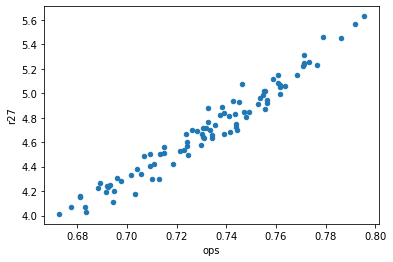

In [9]:
lg_bat.plot.scatter(x='ops', y='r27')

<AxesSubplot:xlabel='ops', ylabel='r27'>

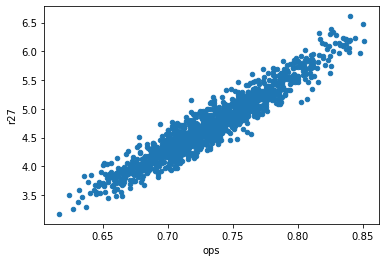

In [10]:
tm_bat.plot.scatter(x='ops', y='r27')

In [11]:
fig = px.scatter(lg_bat.reset_index(), x='ops', y='r27', trendline="ols", hover_name="year_id")
fig.show()

In [12]:
tms_norm = pd.merge(left=tm_bat, right=lg_bat[rate_stat_cols], on=['year_id', 'lg_id'])
tms_norm

,year_id,lg_id,team_id,franch_id,g,r,ab,h,_2b,_3b,...,ba_x,obp_x,slg_x,ops_x,r27_x,ba_y,obp_y,slg_y,ops_y,r27_y
0,1975,NL,ATL,ATL,161,583,5424,1323,179,28,...,0.243916,0.312957,0.346423,0.659380,3.771203,0.257209,0.326833,0.369096,0.695929,4.310834
1,1975,NL,CHN,CHC,162,712,5470,1419,229,41,...,0.259415,0.337677,0.368373,0.706050,4.607862,0.257209,0.326833,0.369096,0.695929,4.310834
2,1975,NL,CIN,CIN,162,840,5581,1515,278,37,...,0.271457,0.352802,0.401183,0.753985,5.469014,0.257209,0.326833,0.369096,0.695929,4.310834
3,1975,NL,HOU,HOU,162,664,5515,1401,218,54,...,0.254034,0.319921,0.358840,0.678761,4.248341,0.257209,0.326833,0.369096,0.695929,4.310834
4,1975,NL,LAN,LAD,162,648,5453,1355,217,31,...,0.248487,0.325138,0.364570,0.689708,4.168692,0.257209,0.326833,0.369096,0.695929,4.310834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2020,AL,OAK,OAK,60,274,1908,430,91,11,...,0.225367,0.321510,0.396226,0.717736,4.948495,0.242786,0.318532,0.414228,0.732760,4.878604
1290,2020,AL,SEA,SEA,60,254,1929,435,88,5,...,0.225505,0.308540,0.369622,0.678162,4.505913,0.242786,0.318532,0.414228,0.732760,4.878604
1291,2020,AL,TBA,TBD,60,289,1975,470,105,12,...,0.237975,0.327876,0.424810,0.752686,5.106675,0.242786,0.318532,0.414228,0.732760,4.878604
1292,2020,AL,TEX,TEX,60,224,1936,420,80,9,...,0.216942,0.284848,0.363636,0.648485,3.906977,0.242786,0.318532,0.414228,0.732760,4.878604


In [13]:
def normalize_team_stats(tm):
    for stat in rate_stat_cols:
        tm[stat+'+'] = tm[stat+'_x'] / tm[stat+'_y']

In [14]:
normalize_team_stats(tms_norm)
tms_norm

,year_id,lg_id,team_id,franch_id,g,r,ab,h,_2b,_3b,...,ba_y,obp_y,slg_y,ops_y,r27_y,ba+,obp+,slg+,ops+,r27+
0,1975,NL,ATL,ATL,161,583,5424,1323,179,28,...,0.257209,0.326833,0.369096,0.695929,4.310834,0.948320,0.957545,0.938572,0.947482,0.874820
1,1975,NL,CHN,CHC,162,712,5470,1419,229,41,...,0.257209,0.326833,0.369096,0.695929,4.310834,1.008578,1.033180,0.998040,1.014543,1.068903
2,1975,NL,CIN,CIN,162,840,5581,1515,278,37,...,0.257209,0.326833,0.369096,0.695929,4.310834,1.055395,1.079459,1.086932,1.083422,1.268667
3,1975,NL,HOU,HOU,162,664,5515,1401,218,54,...,0.257209,0.326833,0.369096,0.695929,4.310834,0.987659,0.978854,0.972211,0.975331,0.985503
4,1975,NL,LAN,LAD,162,648,5453,1355,217,31,...,0.257209,0.326833,0.369096,0.695929,4.310834,0.966092,0.994816,0.987737,0.991062,0.967027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2020,AL,OAK,OAK,60,274,1908,430,91,11,...,0.242786,0.318532,0.414228,0.732760,4.878604,0.928252,1.009348,0.956541,0.979496,1.014326
1290,2020,AL,SEA,SEA,60,254,1929,435,88,5,...,0.242786,0.318532,0.414228,0.732760,4.878604,0.928823,0.968631,0.892314,0.925489,0.923607
1291,2020,AL,TBA,TBD,60,289,1975,470,105,12,...,0.242786,0.318532,0.414228,0.732760,4.878604,0.980182,1.029335,1.025546,1.027193,1.046749
1292,2020,AL,TEX,TEX,60,224,1936,420,80,9,...,0.242786,0.318532,0.414228,0.732760,4.878604,0.893552,0.894254,0.877865,0.884989,0.800839


In [15]:
fig = px.scatter(tms_norm, x='ops+', y='r27+', trendline="ols", hover_name="year_id")
fig.show()

In [16]:
X = tms_norm[['ops+']]
y = tms_norm[['r27+']]

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X, y)

LinearRegression()

In [19]:
lr.coef_

array([[2.05980312]])

In [20]:
lr.intercept_

array([-1.05860385])